In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
creditdefault = pd.read_csv("UCI_Credit_Card.csv", index_col ='ID')
creditdefault.rename(columns = lambda x:x.lower(), inplace = True)
creditdefault['grad_schl'] = (creditdefault['education']==1).astype('int')
creditdefault['university'] = (creditdefault['education']==2).astype('int')
creditdefault['high_schl'] = (creditdefault['education']==3).astype('int')
creditdefault.drop('education', axis=1, inplace=True)

creditdefault['male'] = (creditdefault['sex']==1).astype('int')
creditdefault.drop('sex', axis=1, inplace=True)

creditdefault['married'] = (creditdefault['marriage']==1).astype('int')
creditdefault.drop('marriage', axis=1, inplace=True)

pay_features = ['pay_0', 'pay_2','pay_3','pay_4','pay_5', 'pay_6']
for p in pay_features:
    creditdefault.loc[creditdefault[p]<=0, p] =0
    
creditdefault.rename(columns={'default.payment.next.month' : 'Default'}, inplace=True)
creditdefault.to_csv('C:\\Users\\aksha\\creditdefault.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [4]:
target_name = ['Default']
X = creditdefault.drop('Default', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = creditdefault[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=12, stratify=y)

In [5]:
def CMatrix(CM, labels = ['pay', 'Default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name ='PREDICTION'
    df.loc['TOTAL'] = df.sum()
    df['TOTAL'] = df.sum(axis=1)
    return df

In [6]:
metrics= pd.DataFrame(index=['accuracy', 'precision', 'recall'], columns=['LogisticReg', 'ClassTree', 'NaiveBayes'])

# Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)
#accuracy_score(y_pred_test, y_test)

C:\Users\aksha\Anaconda32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PREDICTION,pay,Default,TOTAL
TRUE,,,
pay,5817,1192,7009
Default,891,1100,1991
TOTAL,6708,2292,9000


# Classification Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)
class_tree.fit(X_train, y_train)
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)
#accuracy_score(y_pred_test, y_test)

PREDICTION,pay,Default,TOTAL
TRUE,,,
pay,6320,689,7009
Default,1262,729,1991
TOTAL,7582,1418,9000


# Logistics Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(n_jobs=-1, random_state=15)
logisticreg.fit(X_train, y_train)
y_pred_test = logisticreg.predict(X_test)
metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)
#accuracy_score(y_pred_test, y_test)

C:\Users\aksha\Anaconda32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aksha\Anaconda32\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


PREDICTION,pay,Default,TOTAL
TRUE,,,
pay,6688,321,7009
Default,1339,652,1991
TOTAL,8027,973,9000


In [10]:
100*metrics

,LogisticReg,ClassTree,NaiveBayes
accuracy,81.5556,78.3222,76.8556
precision,67.0092,51.4104,47.993
recall,32.7474,36.6148,55.2486


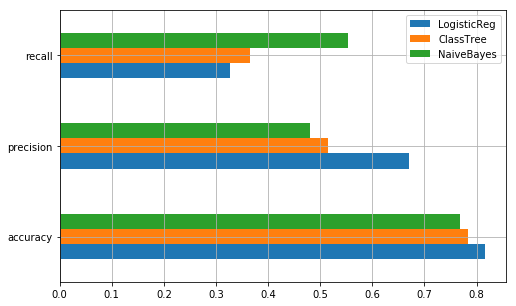

In [15]:
fig, ax= plt.subplots(figsize = (8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_pred=y_pred_test, y_true=y_test))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      7009
          1       0.67      0.33      0.44      1991

avg / total       0.80      0.82      0.79      9000



In [17]:
precision_nb, recall_nb, threshold_nb = precision_recall_curve(y_true=y_test, probas_pred=NBC.predict_proba(X_test)[:,1])

precision_lg,  recall_lg, threshold_lg = precision_recall_curve(y_true=y_test, probas_pred= logisticreg.predict_proba(X_test)[:,1])

In [18]:
precision_nb

array([0.22129599, 0.22120943, 0.22123402, ..., 0.67391304, 0.65873016,
       1.        ])

In [19]:
recall_nb

array([1.        , 0.99949774, 0.99949774, ..., 0.0467102 , 0.04168759,
       0.        ])

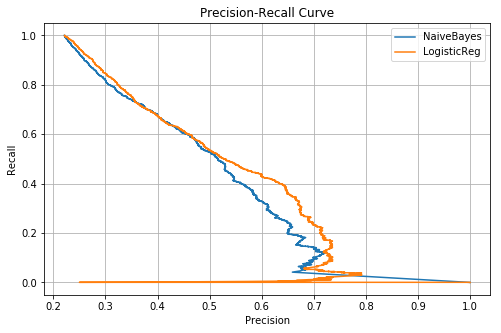

In [20]:
fig, ax= plt.subplots(figsize =(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lg, recall_lg, label='LogisticReg')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid();

In [21]:
ypredprob = logisticreg.predict_proba(X_test)[:,1]
y_pred_test = (ypredprob >=0.3).astype('int')
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print ("Precision:", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
print ("Recall:", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Precision: 55.470588235294116
Recall: 47.36313410346559


PREDICTION,pay,Default,TOTAL
TRUE,,,
pay,6252,757,7009
Default,1048,943,1991
TOTAL,7300,1700,9000


In [44]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1,-1)
    data = robust_scaler.transform(data)
    prob = logisticreg.predict_proba(data)[0][1]
    if prob >=0.2:
        return 'Will Default'
    else:
        return 'Will Pay'

In [45]:
pay = creditdefault[creditdefault['Default']==0]

In [46]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal', 8000), ('age', 30), ('bill_amt1',760),('bill_amt2',45000),('bill_amt3',600),('bill_amt4',0),
                           ('bill_amt5',0),('bill_amt6',0),('pay_amt1',0),('pay_amt2',0),('pay_amt3',7800),('pay_amt4',0),
                           ('pay_amt5',34089),('pay_amt6',0),('male',0), ('grad_schl',0),('university',1),
                           ('high_schl',0),('married',1),('pay_0',0),('pay_2',-1),('pay_3',0),('pay_4',-1),('pay_5',-1),
                           ('pay_6',0)])
new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'Will Default'